In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Аналитика в Яндекс.Афише

У нас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* visits - лог сервера с данными о посещениях сайта Яндекс.Афиши,
* orders - выгрузка всех заказов за этот период,
* costs - статистика рекламных расходов.

Узнаем:
как люди пользуются продуктом,
когда они начинают покупать,
сколько денег приносит каждый клиент
когда клиент окупается.

0. [Данные](#step0) 
1. [Продукт](#step1)  
2. [Продажи](#step2) 
3. [Маркетинг](#step3) 
4. [Выводы](#step4) 

### Наша задача: 
### Разобраться в стоимости привлечения клиентов, помочь маркетологам оптимизировать маркетинговые затраты. И предложить оптимальные источники/платформы трафика для Яндекс Афиша

##  Загрузим данные и подготовим к анализу <a id="step0"></a>

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

Переведем столбцы со временем в правильный формат. Взлянем на дубликаты и пропущенные данные.

In [3]:
for name in [visits, orders, costs]:
    name.columns = name.columns.str.lower().str.replace(' ', '_')
    print('Количество дубликатов - ', name.duplicated().sum())
    print(name.info())
    display(name.describe())

visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['session'] = (visits['end_ts'].dt.ceil('1T') - visits['start_ts'])/ np.timedelta64(1,"m")
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])


for name in [visits, orders, costs]:
    display(name)

Количество дубликатов -  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null object
source_id    359400 non-null int64
start_ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


,source_id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


Количество дубликатов -  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


Количество дубликатов -  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


,device,end_ts,source_id,start_ts,uid,session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.0
...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,1.0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,1.0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,1.0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,1.0


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


Найдем первое время посещения и первое время заказа, и добавим в основные таблицы

In [4]:
slova = {'day': 'день', 'week': 'неделю', 'month': 'месяц'}
devices = {'desktop': 'компьютера', 'touch':'гаджета'}

# формула для разбивки на периоды
def period1 (df, st):
#    df['day'] = df[st].dt.day
#    df['week'] = df[st].dt.week
#    df['month'] = df[st].dt.month
    df['hours'] = df[st].dt.hour
    

# формула для разбивки на периоды
def period_full (df, st):
    df['day'] = df[st].astype('datetime64[D]')
    df['week'] = df[st].astype('datetime64[W]')
    df['month'] = df[st].astype('datetime64[M]')
#    df['hours'] = df[st].astype('datetime64[H]')

# формула для групировки
def period_grupp (df):
    group = df.groupby([period_date, 'device']).agg(period = ('uid','nunique')).reset_index()
    
    return group

# формула для добавения знаяений в график
def add_value_labels(ax, spacing=5):
   
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = (rect.get_x() + rect.get_width() / 2 )

        
        space = spacing
        va = 'bottom'

             
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                     
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      
                                        

# колонки от мультииндекса избавить
#pivot_df.columns = pivot_df.columns.map('_'.join)

Добавим с наши данные - столбцы для когортного анализа - когда покупатель впервые пришел и впервые купил.
А так же добавим в таблицу orders - данные о покупателе - первый источник трафика, девайс и дата захода

In [5]:
min_visit = visits.groupby(['uid']).agg(first_datetime = ('start_ts','min'))
min_visit['ferst_visit_month'] =  min_visit['first_datetime'].astype('datetime64[M]')
byer = orders['uid'].unique().tolist()
visits = visits.merge(min_visit, on = 'uid')
visits['first_visit_day'] = visits['first_datetime'].astype('datetime64[D]')
#visits['visit_month'] = visits['first_datetime'].astype('datetime64[M]')
#ferst_visit_month =  visits.groupby(['uid']).agg(ferst_visit_month = ('visit_month','min'))

# оставляем в срезе только те данные где дата сессии равна дате захода 
visits_srez = visits.loc[visits['start_ts'] <= visits['first_datetime']].\
            drop_duplicates(subset=['uid'], keep=False).query('uid in @byer')
visits_srez = visits_srez[['uid','device', 'source_id']]

orders.pipe(period_full,'buy_ts')
min_orders = orders.groupby('uid').agg(first_bye_month = ('month','min'))
orders = orders.merge(min_orders, on = 'uid')
orders = orders.merge(visits_srez, on = 'uid')
orders = orders.merge(min_visit, on = 'uid')
#orders = orders[orders['source_id'] != 7]
#visits = visits[visits['source_id'] != 7]


У нас есть данные за год по клиентам - покупателям билетов через сервис Афиша. Они использую для захода на сайт 2 типа устройств - детескоп или гаджеты. Мы добавили в таблицу заказов - информацию о первом визите пользователя и об первом источнике, чтобы потом использовать эти данные в когортном анализе, и анализе расходов на источники трафика.

## Продукт <a id="step1"></a>

* Сколько людей пользуются в день, неделю, месяц.
* Сколько сессий в день?
* Сколько длится одна сессия?
* Как часто люди возвращаются?

### Сколько людей пользуются в день, неделю, месяц.

Посмотрим изменение DAU, WAU, MAU в целом по продукту.

In [6]:
visits.pipe(period_full,'start_ts')
dau_total = visits.groupby('day').agg({'uid': 'nunique'})
wau_total = visits.groupby(['week']).agg({'uid': 'nunique'})
mau_total = visits.groupby(['month']).agg({'uid': 'nunique'})

print('Количество уникальных пользователей в день', int(dau_total.mean()))
print('Количество уникальных пользователей в неделю', int(wau_total.mean()))
print('Количество уникальных пользователей в месяц', int(mau_total.mean()))


Количество уникальных пользователей в день 907
Количество уникальных пользователей в неделю 5724
Количество уникальных пользователей в месяц 23228


In [7]:
visits.pipe(period_full,'start_ts')
for period_date in ['day', 'week', 'month']:
    table = visits.pipe(period_grupp).pivot_table(index = period_date, columns ='device', values = 'period').reset_index()
    srednee_desktop = int(table['desktop'].mean())
    srednee_touch = int(table['touch'].mean())
    print('Среднее количество посетителей сайта в',slova[period_date])
    print('Детескопной версии', srednee_desktop)
    print('Через гаджеты', srednee_touch)


Среднее количество посетителей сайта в день
Детескопной версии 659
Через гаджеты 252
Среднее количество посетителей сайта в неделю
Детескопной версии 4135
Через гаджеты 1637
Среднее количество посетителей сайта в месяц
Детескопной версии 16724
Через гаджеты 6825


График среднего количества посетителей сайта - день/неделя/месяц


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


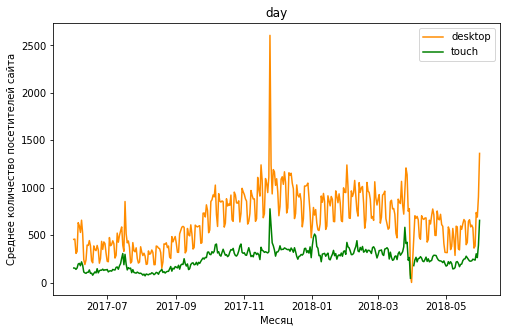

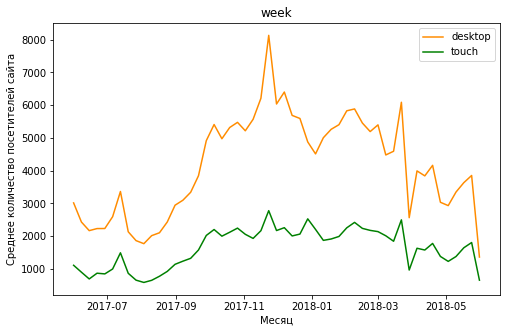

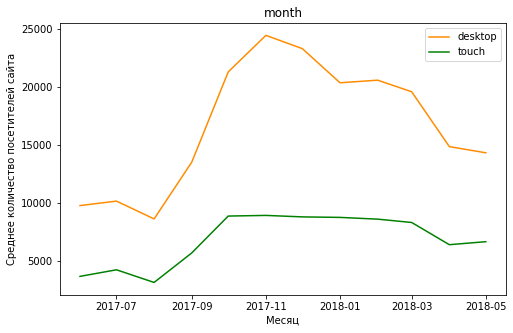

In [8]:
print('График среднего количества посетителей сайта - день/неделя/месяц')
for period_date in ['day', 'week', 'month']:
    table = visits.pipe(period_grupp).pivot_table(index = period_date, columns ='device', values = 'period').reset_index()
    x = table[period_date].tolist()
    y1 = table['desktop'].tolist()
    y2 = table['touch'].tolist()
    fig, ax = plt.subplots()

    ax.plot(x, y1,  color="#FF8C00", label = 'desktop')
    ax.plot(x, y2, 'g', label = 'touch')
    #ax.plot(x, y3, label = r'$\frac{sin(x)}{x}$')

    ax.legend()
    plt.xlabel('Месяц')
    plt.ylabel('Среднее количество посетителей сайта')
    plt.title(period_date)
    fig.set_figheight(5)
    fig.set_figwidth(8)
    plt.show()
#table

Посчитаем сколько в среднем количество сессий в день у пользователя с разными типами устройств

In [9]:
sessions_per_user = visits.groupby(['day', 'device']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user.groupby(['device']).agg({'sessions_per_user' : 'mean'})

,sessions_per_user
device,
desktop,1.088955
touch,1.051072


В среднем, что для детескопа что для гаджетов -  один пользователь в среднем совершает одну сессию в день.

Графики дневных и недельных посещений для разных категорий пользователей - вроде-бы повторяют друг друга, но месячная активность показывает, что количество уникальных пользователей в детескопной версиии выросло после октября 2017 года. Посмотрим график зависимости продаж по устройствам, изменилось ли что то или только посещаемость выросла а продажи не увеличились.

### Сколько сессий в день

Посчитаем среднее по дням для каждого из типов устройств, и посмотрим как распределяются количетсво ссесий по часам в день исходя из устройств пользователей. 

In [10]:
for znach in visits['device'].unique():
    srez = visits.loc[visits['device'] == znach].copy()
    session = srez.groupby('day').agg(period_date = ('session','count'))
    srednee = int(session.mean())
    print('Количество сессий в день с',devices[znach],'в среднем',srednee)

Количество сессий в день с гаджета в среднем 266
Количество сессий в день с компьютера в среднем 721


Количество сесий у посетителей с гаджетов не сильно отличается от количества самих посетителей - то есть один пользователь заходит только раз на сайт, а с детескопа посетитель появляется чаще чем один раз.

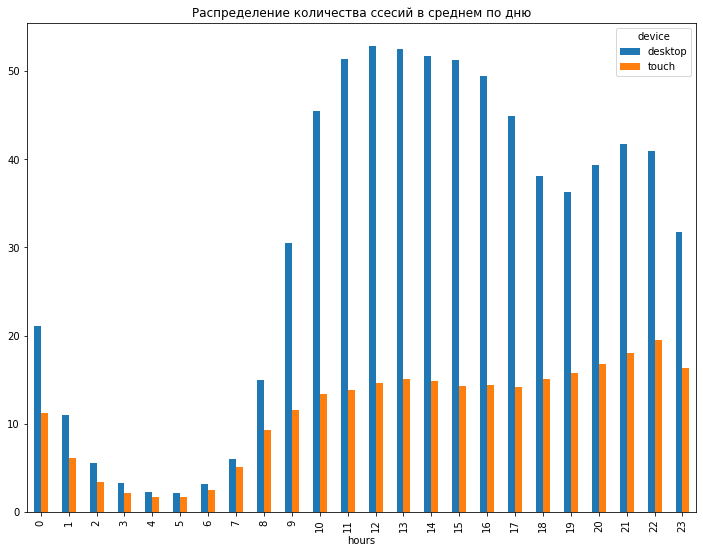

In [11]:
visits.pipe(period1,'start_ts')

desktop_hours = visits.groupby(['device','day', 'hours']).agg(session_count = ('session','count')).reset_index()
tab = desktop_hours.pivot_table(index = 'hours', columns = 'device', values = 'session_count', aggfunc = 'mean')

tab.plot(kind = 'bar', figsize=(12, 9))
#tab[['desktop','touch']].plot(kind='box',figsize=(10,5),vert=False)
#sns.plot(data= tab,figsize=(12, 9), palette="Blues")
plt.title('Распределение количества ссесий в среднем по дню')
plt.show()

Вывод для маркетинга - пользователи в разное время используют разные устройства для посещения сайта. В рабочее время - это в большинстве компьютер, в вечернее время - использование мобильных устройств растет. Надо настроить рекламу в большей степени на компьютеры, но повышать ставки по рекламе на мобильные устройства - в вечернее время. 

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Очень наглядный график и выводы полезные


</div>

---


### Сколько длится одна сессия?

Посмотрим распределение длин сессий

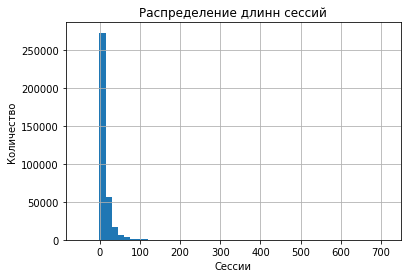

In [12]:
visits['session'].hist(bins=50)

plt.xlabel('Сессии')
plt.ylabel('Количество')
plt.title('Распределение длинн сессий')
fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()

Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану. Наше — не из таких, рассчитаем моду

In [13]:
print('Самая частая длительность сессии составляет {:.0f} минуту'.format(visits['session'].mode()[0]))

Самая частая длительность сессии составляет 1 минуту


### Как часто люди возвращаются?

Рассчитаем Retention Rate

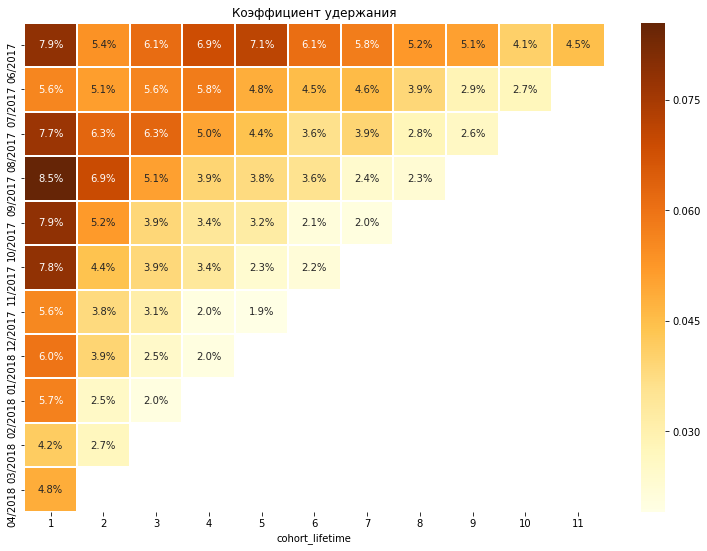

In [14]:
# Найдём lifetime когорты
visits['cohort_lifetime'] = visits['month']- visits['ferst_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

# сгруппируем по 1 месяцу и lifetime и посчитаем уникальное количество пользователей 
cohorts = visits.groupby(['ferst_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['ferst_visit_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='ferst_visit_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

# уберем из тепловой карты 1 месяц 
cohorts = cohorts[cohorts['cohort_lifetime']>0]

#сформируем сводную таблицу по когортам
retention_pivot = cohorts.pivot_table(index='ferst_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot.index = retention_pivot.index.strftime("%m/%Y")
plt.figure(figsize=(13, 9))

#построим тепловую карту
plt.title('Коэффициент удержания')
sns.heatmap(retention_pivot, cmap='YlOrBr',annot=True, fmt='.1%', linewidths=1, linecolor='white')
plt.show()

Март и апрель оказались провальными месяцами по всем когортам - по коэффициенту удержания. Октябрь и ноябрь сильные месяца по визитам. Февраль заставил многих покупателей из когорт вернуться и заказать билетик. Скорей всего это покупки были для себя и в подарок на гендерные праздники - в феврале - марте.

## Выводы - продукт:

Мы посмотрели среднее количество посетителей сайта Яндекс Афиша  - в день среднем 900 людей посещают сайт, в неделю 5700 неделю и  23000 в месяц.
В среднем один пользователь находится на сайте 1 минуту. Так же большое количество сессий с длительностью 0 минут. 

У пользователя в течении дня - есть разный период активности -  для гаджета это больше вечернее время , для детескопа самое активное время серфинга - начало рабочего дня.

Мы видим явное сезонное влияние на посещение сайта пользователями  - по таблице Retention Rate. Осенние месяцы показывают достаточно высокий коэффициент удержания ( 5,8 - 7,9 %%) а весенние месяцы наоборот - низкий (1,9 - 2,3 %%)

## Продажи<a id="step2"></a>

* Когда люди начинают покупать?
* Сколько раз покупают за период?
* Какой средний чек?
* Сколько денег приносят? (LTV)

### Когда люди начинают покупать?

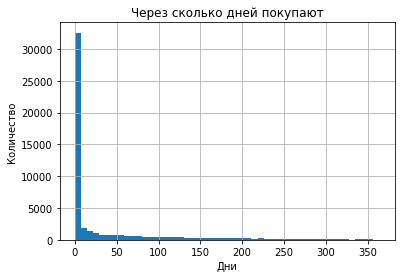

In [15]:
orders['first_visit_day'] = orders['first_datetime'].astype('datetime64[D]')
orders['session_Day'] = (orders['day'] - orders['first_visit_day']) / np.timedelta64(1,"D")
orders['session_Day'].hist(bins=50)
plt.xlabel('Дни')
plt.ylabel('Количество')
plt.title('Через сколько дней покупают')
fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()

In [16]:
print('Разница в днях между первым посещением и покупкой - {:.0f} дней'.format(orders['session_Day'].mode()[0]))

Разница в днях между первым посещением и покупкой - 0 дней


Получается что в среднем покупают в тот же день, когда попадают впервые на сайт Афиши.

### Сколько раз покупают за период?

Рассчитаем количество покупок по когортам для разных топов устройств

Количество покупок по когорте, шт


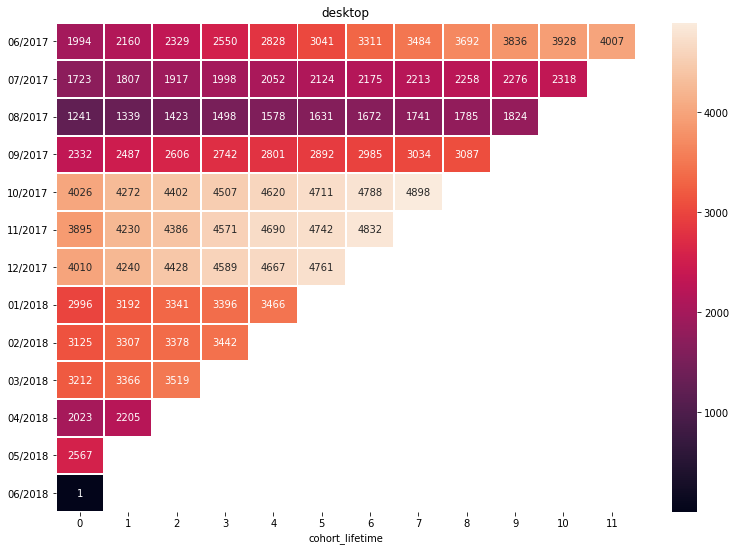

Количество покупок по когорте, шт


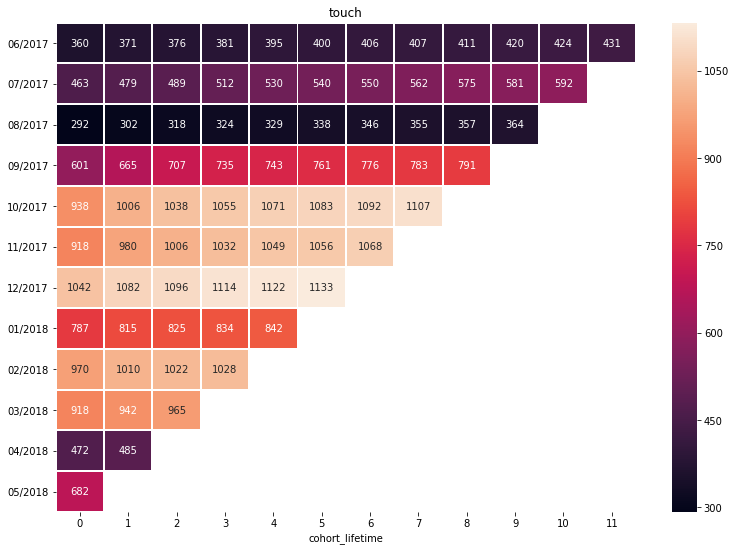

In [17]:
# делаем когорту по месяцу первого заказа
#количество покупок по когорте
orders['cohort_lifetime'] = orders['month']- orders['first_bye_month']
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1,'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')

for znach in orders['device'].unique():
    srez = orders.loc[orders['device'] == znach].copy()
    col_byer = srez.pivot_table(index='first_bye_month', columns='cohort_lifetime', values='uid', aggfunc='count')
 #   col_byer = col_byer.cumsum(axis=1).round(2)
    col_byer.index = col_byer.index.strftime("%m/%Y")
 #   col_byer = col_byer.cumsum(axis=1).sum(axis=0)
    plt.figure(figsize=(13, 9))
    print('Количество покупок по когорте, шт')
    plt.title(znach)
    sns.heatmap(col_byer.cumsum(axis=1), annot=True, fmt='g', linewidths=1, linecolor='white')
    plt.show()

Количество покупок за период зависит от когорты - есть хорошие когорты. Есть отличные когорты - например как 06/2017 и 10/2017 которые вышли за 7 месяцев к повторному количеству заказов - больше 1000, а есть когорта 07 и 08 - 2017, которые смогли обеспечить только 500 заказов повторных

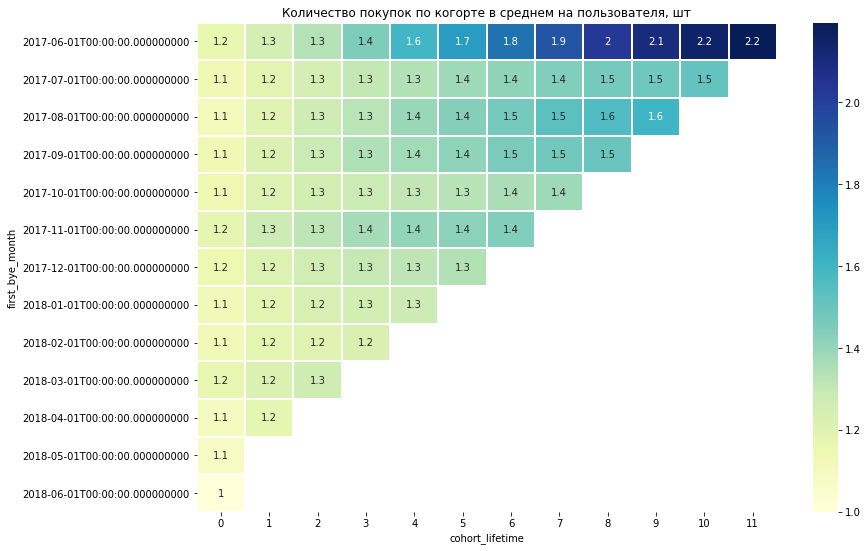

In [18]:
byer = orders.groupby('first_bye_month').agg(uid_count =('uid', 'nunique')).reset_index()
orders = orders.merge(byer, on = 'first_bye_month') 
col_byer.cumsum(axis=1)
one_byer = orders.groupby(['first_bye_month','cohort_lifetime']).\
            agg(byer_count=('uid_count','max'), revenue_count =('uid', 'count')).reset_index().\
            assign(one_byer = lambda x: x['revenue_count'] / x['byer_count'])
one = one_byer.pivot_table(
        index='first_bye_month', 
        columns='cohort_lifetime', 
        values='one_byer')

plt.figure(figsize=(13, 9))

plt.title('Количество покупок по когорте в среднем на пользователя, шт')
sns.heatmap(one.cumsum(axis=1), annot=True,  fmt = '.2g', cmap="YlGnBu", linewidths=1, linecolor='white')
plt.show()
#srez

К полугоду в среднем человек покупает 1,4 или 1,3 раза единственное отличие в 1 когорте, где к полугоду совершенно 1,7 покупки на пользователи.

Выручка Яндекс.Афиши в месяц по когортам, накопительная


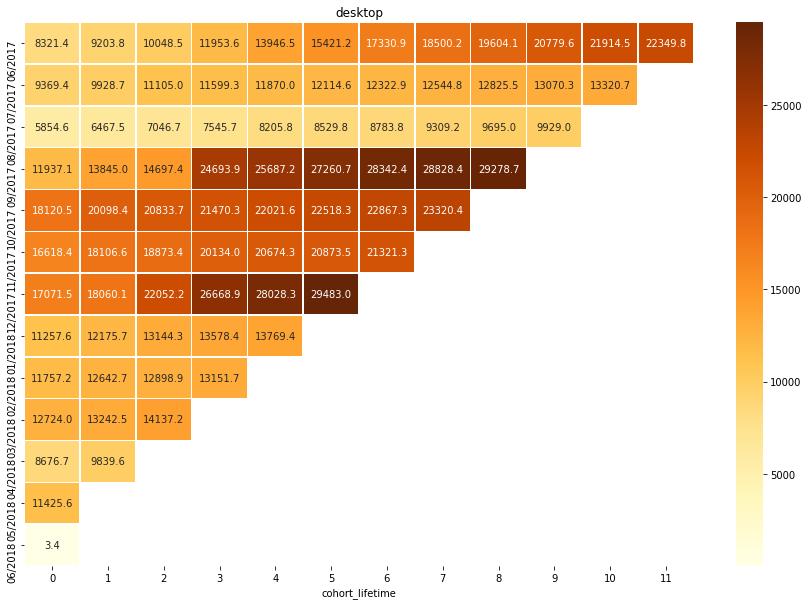

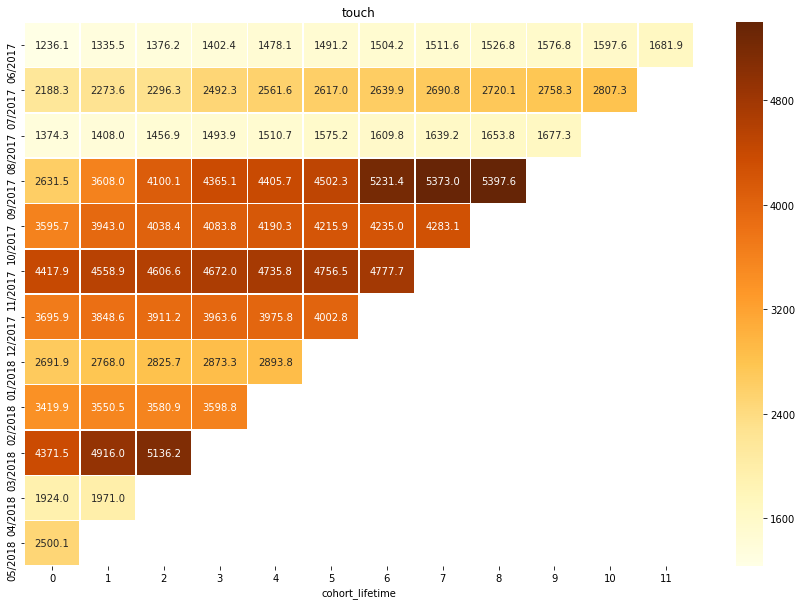

In [19]:
print('Выручка Яндекс.Афиши в месяц по когортам, накопительная')
#сумма всех покупок в месяц по когортам
for znach in orders['device'].unique():
    srez = orders.loc[orders['device'] == znach].copy()
    cohorts_orders = srez.groupby(['first_bye_month','cohort_lifetime']).\
        agg(summa_orders = ('revenue', 'sum'), count_orders = ('revenue', 'count')).reset_index()
    cohorts_orders_sum_count_monht = cohorts_orders.pivot_table(index = 'first_bye_month', columns = 'cohort_lifetime',
                                                      values = 'summa_orders', aggfunc = 'sum')
    cohorts_orders_sum_count_monht.index = cohorts_orders_sum_count_monht.index.strftime("%m/%Y")
    cohorts_orders_sum_count_monht2 = cohorts_orders_sum_count_monht.cumsum(axis=1).round(2)

    plt.figure(figsize=(15, 10))
 #   plt.title('Выручка Яндекс.Афиши в месяц по когортам, накопительная')
#    print('Выручка Яндекс.Афиши в месяц по когортам, накопительная')
    plt.title(znach)
    sns.heatmap(cohorts_orders_sum_count_monht2, cmap='YlOrBr',fmt = '.1f', annot=True, linewidths=0.5, linecolor='white');

Видно, что в августе - несезон и эта когорта так и не стала приносить выручку в компанию, зато с сентября начинается бурный рост выручки, которая даже в перввый месяц перекрывает выручку августовкой когорты.

### Какой средний чек?

Посмотрим изменение среднего чека относительно источника трафика

Средний чек источника -  1 составляет - 5.2
Средний чек источника -  2 составляет - 5.8
Средний чек источника -  3 составляет - 4.1
Средний чек источника -  4 составляет - 4.2
Средний чек источника -  5 составляет - 4.3
Средний чек источника -  9 составляет - 3.5
Средний чек источника -  10 составляет - 2.9
Средний чек источника -  7 составляет - 1.2
month
2017-08-01    1.22
Name: srednii_chek, dtype: float64


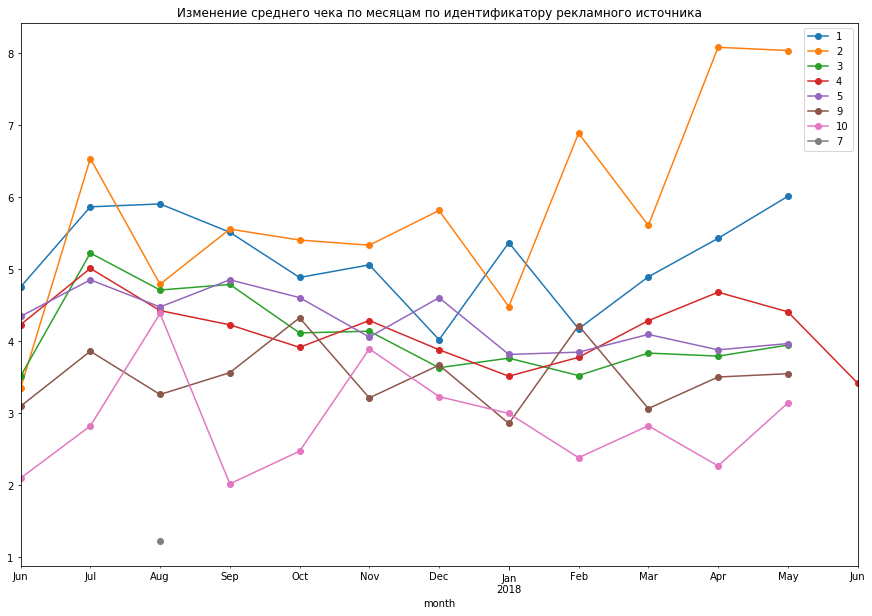

In [20]:
#Количество покупок на одного пользователя и их сумма по неделям
orders_u = orders.groupby(['month','source_id','uid']).agg(summa_orders = ('revenue', 'sum'), count_orders = ('revenue', 'count')).reset_index()
orders_u['srednii_chek'] =orders_u['summa_orders']  / orders_u['count_orders']
#orders_u.pivot_table(index = 'month', values = 'srednii_chek', aggfunc = '')
plt.figure(figsize=(15, 10))
for znach in orders_u['source_id'].unique():
    srez = orders_u.loc[orders_u['source_id'] == znach].copy()
 #   plt.figure(figsize=(15, 10))
    sred_chek= srez[srez['summa_orders']!=0].groupby('month')['srednii_chek'].mean()
    sred_chek.plot(label  = znach,  linestyle='-', marker='o')
    plt.legend()
    print('Средний чек источника - ',znach, 'составляет -', sred_chek.mean().round(1))
plt.title('Изменение среднего чека по месяцам по идентификатору рекламного источника')
print(sred_chek)

Разные источники показывают нам разные чек в течение года. Например первый и второй источник постоянно держится в топе относительно среднего чека покупателя а 10 и 9 источник всё время дают низкий средний чек относительно всех средних чеков по источникам

### Сколько денег приносят? (LTV)

LTV считают не из выручки, а из валовой прибыли. Значит, нужно найти валовую прибыль, умножив выручку на маржинальность. Но поскольку маржинальность в этом проекте  не указана, будем считать ее за единицу и считать ЛТВ от выручки.
Вычислим общую таблицу и с разбивкой по источникам.

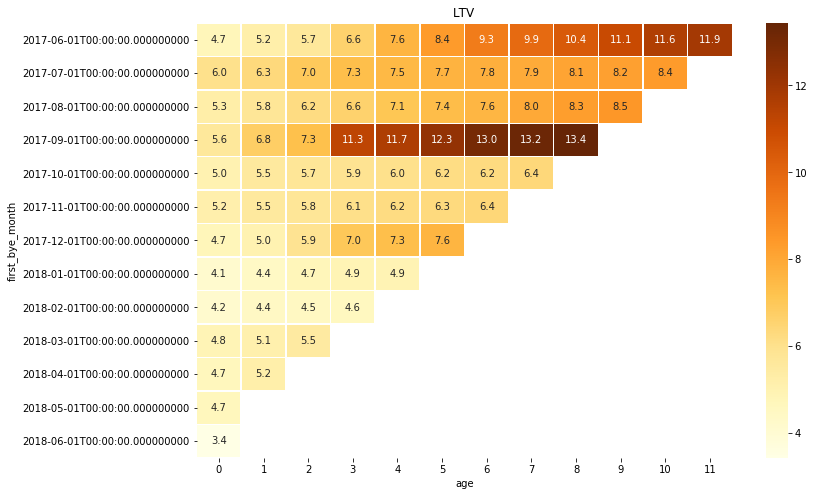

In [21]:
output = orders.groupby(['first_bye_month', 'month']).agg(summa_revenue = ('revenue', 'sum')).reset_index().\
        merge(byer, on = 'first_bye_month').\
        assign(age = lambda x: (x['month'] - x['first_bye_month'])/ np.timedelta64(1, 'M')).\
        assign(age = lambda x: x['age'].round().astype(int),
                ltv = lambda x: x['summa_revenue'] / x['uid_count'])
ltv = output.pivot_table( index='first_bye_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1).round(2)


plt.figure(figsize=(12, 8))
plt.title('LTV')
sns.heatmap(ltv, cmap='YlOrBr',fmt = '.1f', annot=True, linewidths=0.5, linecolor='white');

In [22]:
print('Накопительный LTV за 6 месяцев после первой покупки по когортам:')
ltv.T[5:6:]

Накопительный LTV за 6 месяцев после первой покупки по когортам:


first_bye_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
age,,,,,,,,,,,,,
5,8.36,7.66,7.38,12.31,6.16,6.28,7.64,NaN,NaN,NaN,NaN,NaN,NaN


Добавим данные LTV по каждому источнику

In [23]:
cac_t = []
romi_t= []
lt = []
zn= []
costs.pipe(period_full,'dt')
for znach in orders['source_id'].unique():
    
# делаем срезы по источникам
    srez = orders.loc[orders['source_id'] == znach].copy()
    srez_costs = costs.loc[costs['source_id'] == znach].copy()
    
#группируем по месяцу  и склеим   
    bye_source_id = srez.groupby('first_bye_month').agg(uid_count = ('uid', 'nunique')).reset_index()
    costs_source_id = srez_costs.groupby('month').agg(summa_costs = ('costs', 'sum')).reset_index().\
                      rename(columns={'month':'first_bye_month'})
    output_source_id = srez.groupby(['first_bye_month', 'month']).agg(summa_revenue = ('revenue', 'sum')).reset_index()
    
    output_source_id = output_source_id.merge(bye_source_id, on = 'first_bye_month')
    output_source_id = output_source_id.merge(costs_source_id, on='first_bye_month').\
           assign(age = lambda x: (x['month'] - x['first_bye_month'])/ np.timedelta64(1, 'M')).\
       assign(age = lambda x: x['age'].round().astype(int),
               ltv = lambda x: x['summa_revenue'] / x['uid_count']).\
       assign(cac = lambda x: x['summa_costs'] / x['uid_count']).\
       assign(romi = lambda x: x['ltv'] / x['cac'])
    
#сделаем сводные таблицы по необходымим значениям найдем среднее и добавим в новую таблицу уже в разрезе источников
    ltv = output_source_id.pivot_table( index='first_bye_month', columns='age', values='ltv', aggfunc='mean').round(2)
    ltv1 = ltv.cumsum(axis=1).mean(axis=0).round(2).tolist()
    zn.append(znach)
    lt.append(ltv1) 
    
    cac2 = output_source_id.pivot_table( index='first_bye_month', values='cac', aggfunc='min').round(2)
    cac1 = cac2.cumsum(axis=1).mean(axis=0).round(2).tolist()
    cac_t.append(cac1)
    
    romi2 = output_source_id.pivot_table( index='first_bye_month', columns='age', values='romi', aggfunc='mean').round(2)
    romi1 = romi2.cumsum(axis=1).mean(axis=0).round(2).tolist()
    romi_t.append(romi1)


# создадим таблицы - шде индексом будет служить уникальные значения из источника рекламного,
#а данными будут среднее значение по когортам для каждого источника

romi_finish = pd.DataFrame(index = zn, data = romi_t)
cac_finish = pd.DataFrame(index = zn, data = cac_t) 

ltv_finish = pd.DataFrame(index = zn, data = lt)


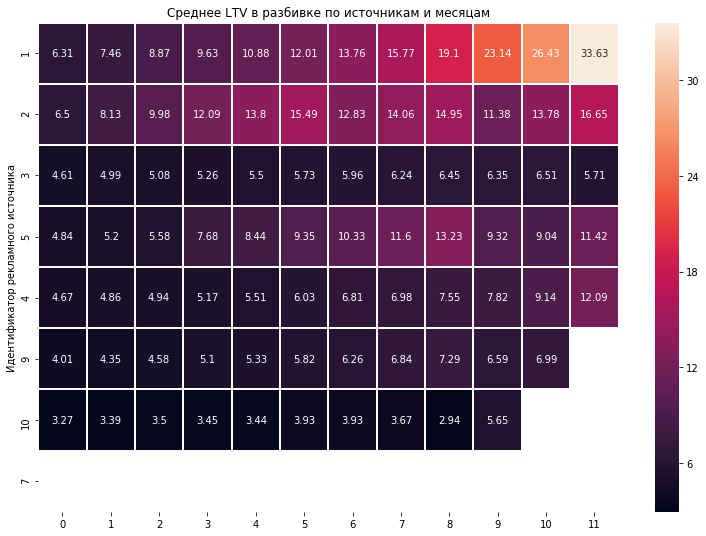

Средний LTV за 6 месяцев после первой покупки по источникам:


,1,2,3,5,4,9,10,7
5,12.01,15.49,5.73,9.35,6.03,5.82,3.93,NaN


In [24]:
plt.figure(figsize=(13, 9))
plt.title('Среднее LTV в разбивке по источникам и месяцам')
sns.heatmap(ltv_finish, annot=True, fmt='g', linewidths=1, linecolor='white', xticklabels = 'auto')
plt.ylabel('Идентификатор рекламного источника')
plt.show()

ltv_finish
m6_cum_ltv = ltv_finish[[5]]
print('Средний LTV за 6 месяцев после первой покупки по источникам:')
m6_cum_ltv.T

Мы посчитали итоговую сумму денег, которую один клиент приносит в среднем со всех своих покупок по валовой прибыли с клиента за период жизни. В хороших когортах прибыль удваивается по клиенту.

Посмотрим накопительный по первым 5 когортам, через пол года после первго посещения получилось что:
1. июнь - 8.36	
2. июль - 7.66
3. август - 7.38
4. сентябрь - 12.31
5. октябрь - 6.16
6. ноябрь - 6.28

Сентябрьская когорта дала больше всех прибыли за пол года работы - именно на нее попало время увеличение продаж осенью, а так же эти клиенты хорошо закупались в декабре.

Посмотрим LTV по источникам:

1. 12.01
2. 15.49
3. 5.73
4. 6.03
5. 9.35
9. 5.82
10. 3.93

Прибыль по источникам отличается в разы. Отметим для себя 1,2 источник обязаетльно, а так же 4 и 5 - приглядеться.

### Таблицы данных по покупкам

Посчитаем еще несколько графиков, чтобы понять наших клиентов.

desktop


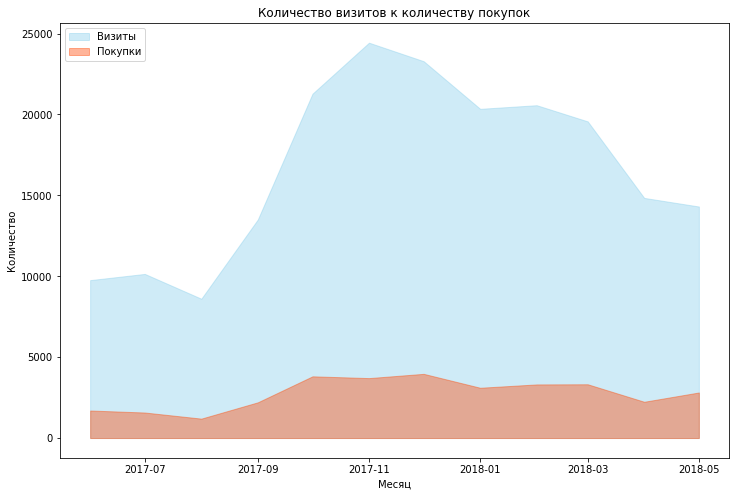

touch


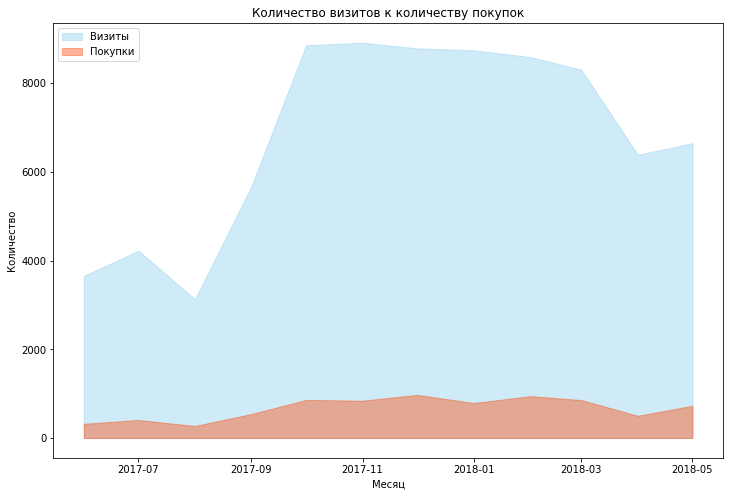

In [25]:
# количество визитов к количеству покупок
visits['month_n'] = visits['month'].apply(lambda x: x.date())
costs.pipe(period_full,'dt')
for row in ('desktop', 'touch'):
    print(row)
    col = visits.groupby(['device','month_n']).agg(uid_count =('uid', 'nunique')).reset_index().loc[lambda x: x['device'] == row]
    col1 = orders.query('month != "2018-06-01"').groupby(['device','month']).agg(uid_count =('uid', 'nunique')).reset_index().loc[lambda x: x['device'] == row]
    x = col['month_n'].tolist()
    y = col['uid_count'].tolist()
    plt.figure(figsize=(12, 8))
    plt.fill_between( x, y, color="skyblue", alpha=0.4,label = 'Визиты')
#.plot(figsize=(12, 8))


    y3 = col1['uid_count'].tolist()
    plt.fill_between( x, y3, color="orangered", alpha=0.4, label = 'Покупки')

    plt.legend(loc='upper left')
    plt.title('Количество визитов к количеству покупок')
    plt.ylabel('Количество')
    plt.xlabel('Месяц')
    plt.show()

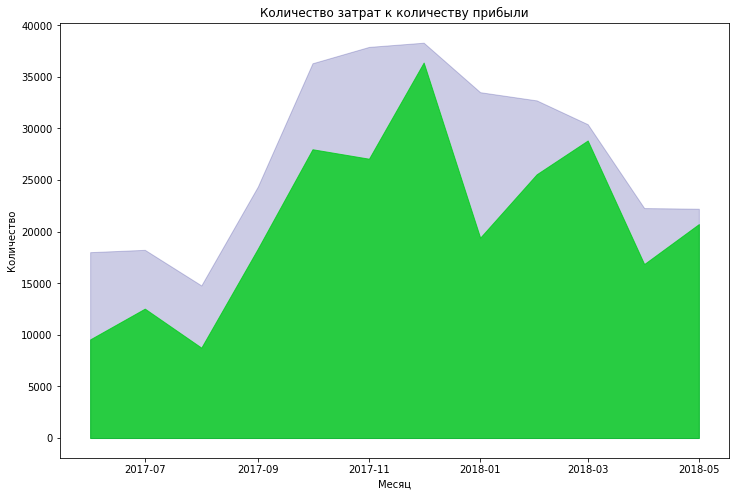

In [26]:
plt.figure(figsize=(12, 8))
col2 = orders.query('month != "2018-06-01"').groupby('month').agg(summa_orders =('revenue', 'sum')).reset_index()
y2 = col2['summa_orders'].tolist()
plt.fill_between( x, y2, color="lime", alpha=0.8)

col3 = costs.groupby('month').agg(summa_costs =('costs', 'sum')).reset_index()
y3 = col3['summa_costs'].tolist()
plt.fill_between( x, y3, color="navy", alpha=0.2)
plt.title('Количество затрат к количеству прибыли')
plt.ylabel('Количество')
plt.xlabel('Месяц')
plt.show()

Пока затраты превышают прибыль, и в некоторые месяца - очень значительно, как например в январе. Подумать над тем, чтобы в эти месяца - уменьшить количество расходов.

Проверим теорию, что средние показания отношения - количества на сумму заказа относительно устройства пользователя не отличается.

In [27]:
#сделаем 2 выборки и посчитаем отношение
orders_desktop = orders.loc[lambda x: x['device'] == 'desktop'].groupby(['first_bye_month']).agg(summa_renevu =('revenue', 'sum'),count_renevu =('revenue', 'count')).\
        reset_index().assign(srednee = lambda x: x['count_renevu']/ x['summa_renevu'] )

orders_touch = orders.loc[lambda x: x['device'] == 'touch'].groupby(['first_bye_month']).agg(summa_renevu =('revenue', 'sum'),count_renevu =('revenue', 'count')).\
        reset_index().assign(srednee = lambda x: x['count_renevu']/ x['summa_renevu'] )    
from scipy import stats as st
import numpy as np

sample_1 = orders_desktop.srednee.tolist()
sample_2 = orders_touch.srednee.tolist()

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Среднее отношение между количеством заказов и их ценой не различается между компьютером и гаджетом.")

p-значение: 0.1395016702295924
Среднее отношение между количеством заказов и их ценой не различается между компьютером и гаджетом.


Значит в среднем, с гаджета покупают на такую же стоимость как купили бы с компьютера.

## Маркетинг <a id="step3"></a>

* Сколько денег потратили? Всего / на каждый источник / по времени
* Сколько стоило привлечение одного покупателя из каждого источника?
* На сколько окупились расходы? (ROI)


### Сколько денег потратили? Всего / на каждый источник / по времени <a id="step10"></a>

Создадим таблицу затрат по источникам и месяцам:

In [28]:
promo_costs= costs.groupby(['source_id','month'])['costs'].sum().reset_index().\
    pivot_table(index = 'month', columns = 'source_id', values = 'costs')
print('Все затраты на проект составили - ', promo_costs.sum().sum())
print()
print('Затраты по источникам составили: ')
display(promo_costs.sum())

Все затраты на проект составили -  329131.62

Затраты по источникам составили: 


source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
dtype: float64

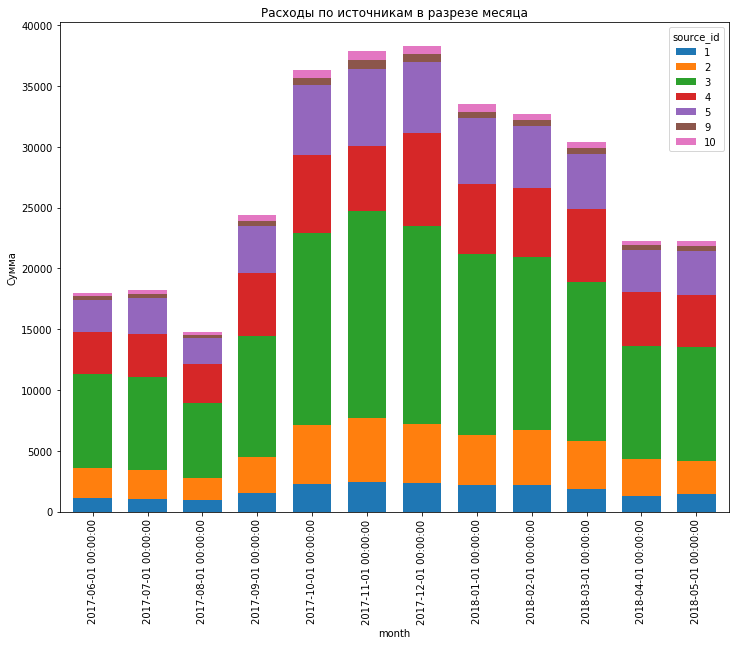

In [29]:
promo_costs.plot(kind = 'bar',figsize=(12, 9),width = 0.7,stacked=True)
plt.title('Расходы по источникам в разрезе месяца')
plt.ylabel('Сумма')
plt.show()


Доходы по источникам в месяц.

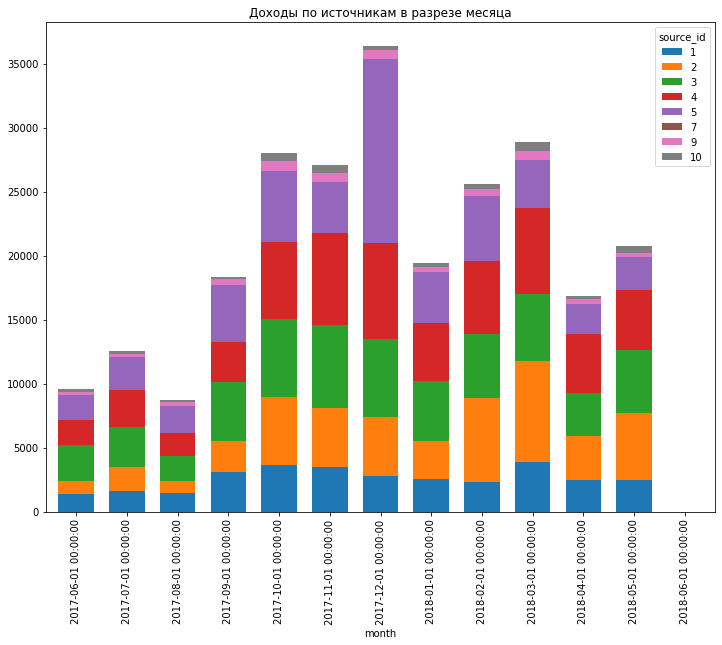

In [30]:
promo_orders = orders.groupby(['source_id','month'])['revenue'].sum().reset_index().\
    pivot_table(index = 'month', columns = 'source_id', values = 'revenue')

promo_orders.plot(kind = 'bar',figsize=(12, 9),width = 0.7,stacked=True)

plt.title('Доходы по источникам в разрезе месяца')

plt.show()


Видно что 3 источник себя не оправдал ни в каком из месяцев потому что затраты на него очень большие а прибыль с него совершенно не выдающиеся. Очень интересно поведение 5 источника в декабре при небольших затратах мы получили очень хорошую прибыль также интересно поведение 2 источника к по февралю и марту - выручка от источника превышает затраты по нему. 
Надо уточнить какие корректировки делалилсь по каждому источнику по месяцу отдельно. Возможно где-то делались какие-то корректировки рекламных кампаний и за счет этого возраста трафик покупателей.

Но в принципе вторая таблица не очень точная, потому что она не показывает расходы в разрезе когорты.

### Сколько стоило привлечение одного покупателя из каждого источника?


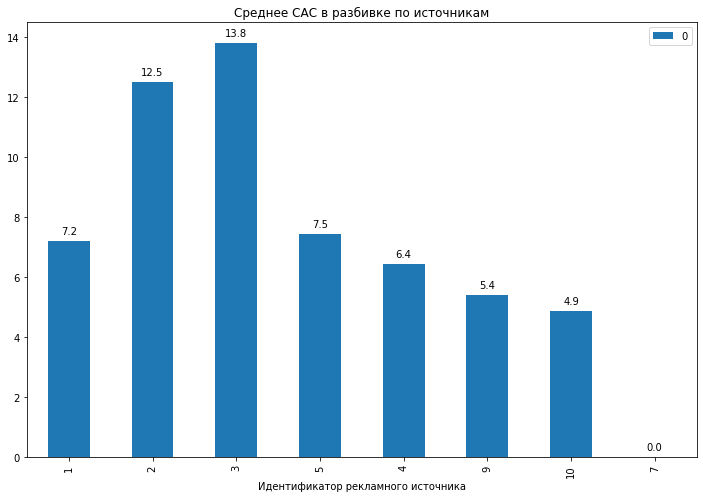

In [31]:
x_labels = cac_finish.index.tolist()
ax.set_xticklabels(x_labels)

ax = cac_finish.plot(kind='bar',figsize=(12, 8))

plt.title('Среднее CAC в разбивке по источникам')
plt.xlabel('Идентификатор рекламного источника')
add_value_labels(ax)
plt.show()

Надо проверить обоснованость такого количества затрат на 3 источник.

### На сколько окупились расходы? (ROI)

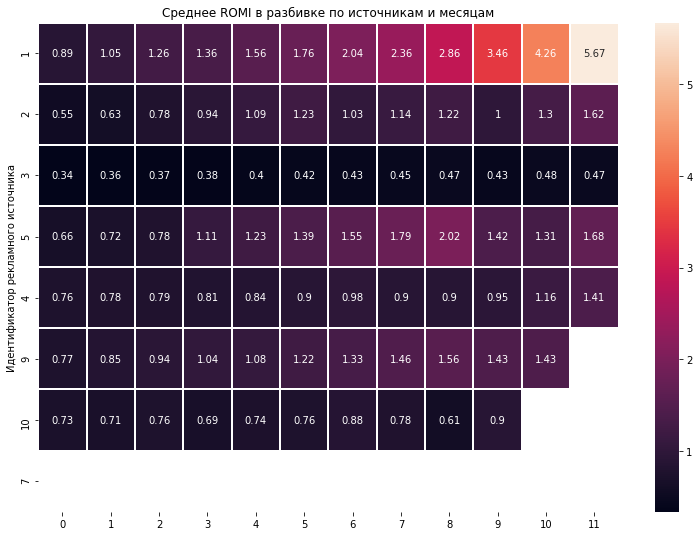

In [32]:
plt.figure(figsize=(13, 9))
plt.title('Среднее ROMI в разбивке по источникам и месяцам')
sns.heatmap(romi_finish, annot=True, fmt='g', linewidths=1, linecolor='white', xticklabels = 'auto')
plt.ylabel('Идентификатор рекламного источника')
plt.show()

Данные показывают, что далеко не все источники одинаково полезны.

Посмотрим прибыль или убыток с каждой когорты посетителей по месяцам. Мы группируем по месяцу захода клиентов, потому что именно в этот месяц мы тратим на привлечение.

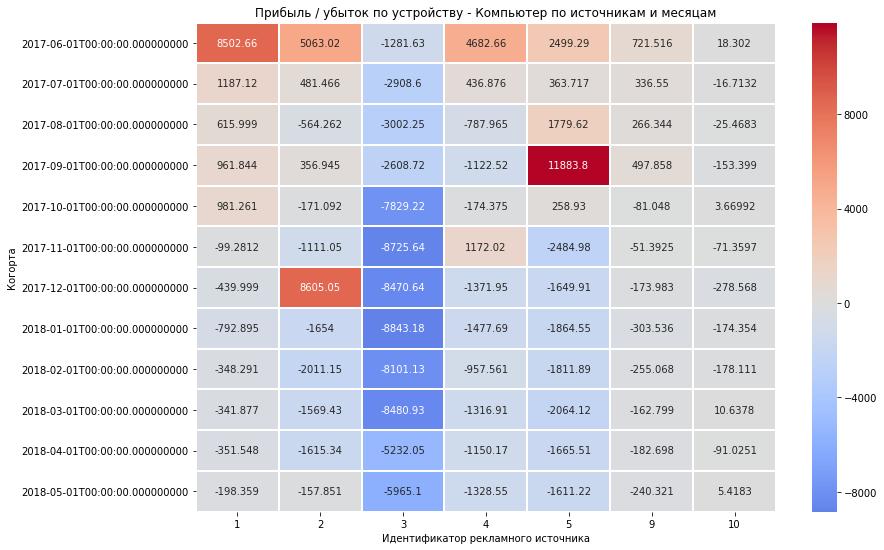

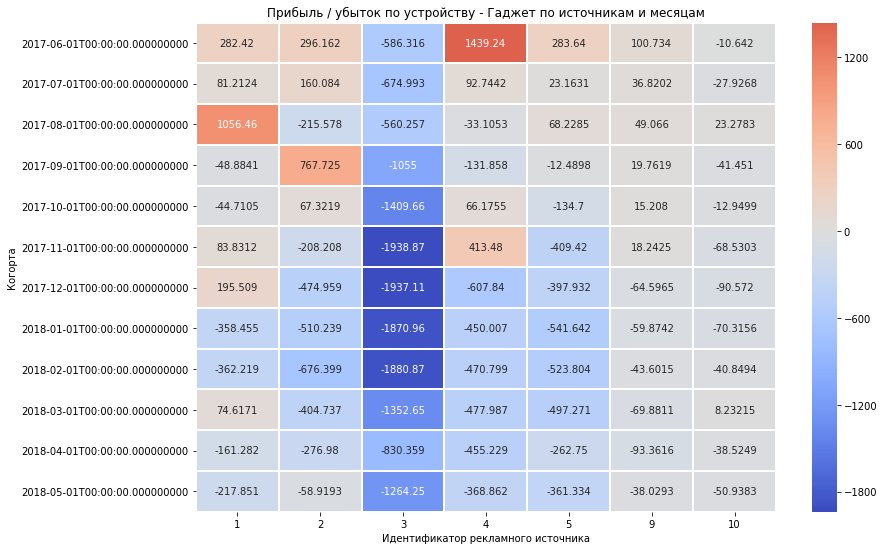

In [33]:
desktop1 = []
touch1 = []
srr =[]
orders = orders.query('month != "2018-06-01"') 
for our_month in orders['month'].unique():
    month_one_byer = orders.loc[orders['ferst_visit_month'] ==our_month].groupby(['source_id']).agg(revenue_count =('uid', 'count'))
    cost_one_byer = costs.loc[costs['month'] == our_month].groupby(['source_id']).\
                    agg(cost_sum =('costs', 'sum')).join(month_one_byer).\
                    assign(one_byer = lambda x: x['cost_sum']/ x['revenue_count']).reset_index()
    cost_one_byer1 = cost_one_byer[['source_id','one_byer']]

    # мы вычислили сколько стоит один покупатель, посчитали прибыль с него по девайсам и источникам и можем понять 
    #как за этот месяц сработали наши источники трафика, сколько привлекли платящих покупателей
    vis = visits.loc[visits['ferst_visit_month'] ==our_month].groupby(['source_id','device']).agg(visits_count =('uid', 'nunique')).reset_index()
    ax = orders.loc[orders['ferst_visit_month'] ==our_month].groupby(['source_id','device']).\
        agg(revenue_count =('uid', 'count'), revenue_sum = ('revenue', 'sum')).reset_index().join(vis['visits_count']).\
        assign(procent_byer = lambda x: x['revenue_count']/ x['visits_count'] *100).\
        merge(cost_one_byer1, on= 'source_id').\
        assign(cena_byer = lambda x: x['revenue_count']* x['one_byer']).\
        assign(pribul_byer = lambda x: x['revenue_sum']- x['cena_byer'])
    ax_desktop = ax[ax['device'] == 'desktop']
    ax_desktop1 = ax_desktop['pribul_byer'].tolist()
    #ax_desktop_srez = ax_desktop[['procent_byer','pribul_byer']]
    ax_touch = ax[ax['device'] == 'touch']
    #ax_touch_srez = ax_touch[['procent_byer','pribul_byer']]
    ax_touch1 = ax_touch['pribul_byer'].tolist()
    touch1.append(ax_touch1)
    desktop1.append(ax_desktop1)
    srr.append(our_month)
ind = [1,2,3,4,5,9,10]
pribul_byer_finish = pd.DataFrame(index = srr, data = desktop1, columns = ind)
pribul_byer_finish_t = pd.DataFrame(index = srr, data = touch1, columns = ind)

plt.figure(figsize=(13, 9))
plt.title('Прибыль / убыток по устройству - Компьютер по источникам и месяцам')
sns.heatmap(pribul_byer_finish, annot=True, fmt='g', linewidths=1, linecolor='white', xticklabels = 'auto', center=0, cmap ='coolwarm')
plt.xlabel('Идентификатор рекламного источника')
plt.ylabel('Когорта')
plt.show()

plt.figure(figsize=(13, 9))
plt.title('Прибыль / убыток по устройству - Гаджет по источникам и месяцам')
sns.heatmap(pribul_byer_finish_t, annot=True, fmt='g', linewidths=1, linecolor='white', xticklabels = 'auto', center=0, cmap ='coolwarm')
plt.xlabel('Идентификатор рекламного источника')
plt.ylabel('Когорта')
plt.show()

Рассчитали точные прибыль / убыток по каждому источнику для каждой когорты Мы видим что 3 источник для всех когорт является убыточным вне зависимости от устройства пользователя, то же время как первый второй источник показывает в большей степени плюс чем минус.Также интересен 5 источник для сентябрьской когорты, где он принес 11883 плюсом к затраченным вложениям.

Экономика одной продажи: строим модель <a id="step11"></a>

Text(0.5, 0, 'Идентификатор рекламного источника')

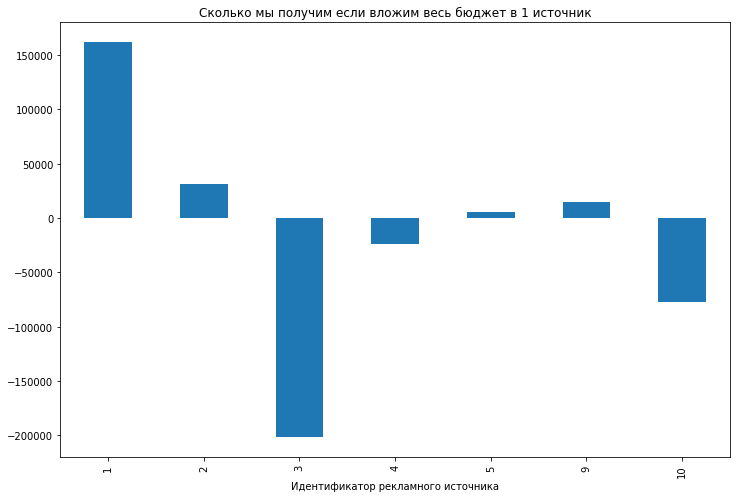

In [34]:
market = orders.groupby(['source_id']).\
        agg(uid_count =('uid', 'count'), revenue_sum = ('revenue', 'sum'))
# эта та самма которую потратили за год
marketing = 329100


market3 = costs.groupby(['source_id']).\
                    agg(cost_sum =('costs', 'sum')).join(market).\
                    assign(revenu_byer = lambda x: x['revenue_sum']/ x['uid_count']).\
                    assign(cena_byer = lambda x: x['cost_sum']/x['uid_count']).\
                    assign(pribul = lambda x: x['revenue_sum']- x['cost_sum']).\
                    assign(item = lambda x: marketing / x['cena_byer']).\
                    assign(renevu_new = lambda x: x['item']*x['revenu_byer']).\
                    assign(pribul_new = lambda x: x['renevu_new']- marketing)

market3['pribul_new'].plot.bar(figsize=(12, 8))
plt.title('Сколько мы получим если вложим весь бюджет в 1 источник')
plt.xlabel('Идентификатор рекламного источника')

Мы вложили весь бюджет в одну определенный источник и получили распределение насколько каждый источник сработает плюс или в минус при полном бюджете равным 329 100. Получилось что первый источник принёс бы больше 150.000 плюсом а третий источник порядка 200 тысяч минусом при том что мы вкладываем в этом источнике весь бюджет Яндекс Афиша на год.

## Вывод: <a id="step4"></a>

* порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?
* Какие источники/платформы вы бы порекомендовали? Объясните свой выбор: на какие метрики вы ориентируетесь? 
* Почему? Какие выводы вы сделали, узнав значение метрик?

За этот год расходы Афиши составили 329100, а доходы только лишь 252100. Команда имеет 8 каналов трафика посетителей, но не все из этих каналов хорошо работают.Юнит-экономика может сходиться для одних каналов привлечения и не сходиться для других. Поэтому LTV и ROMI мы посчитали отдельно для разных каналов привлечения. Так же наши клиенты используют для серфинга - два типа устройств - компьютер и гаджеты.


* Среднее количество посетителей сайта в месяц:
* Детескопной версии 16724
* Через гаджеты 6825

Получается, что порядка 29 процентов посетителей сайта - заходят на него через мобильное устройство.

* Количество сессий в день с гаджета в среднем 266
* Количество сессий в день с компьютера в среднем 721

* Длинна сессии с компьютера в среднем 11.0 минут
* Длинна сессии с гаджета в среднем 7.0 минут

Пользователи чаще заходят на сайт с компьютера и находяться на нем дольше.

* В среднем люди делают покупку c компьютера через 37 суток после первого захода
* В среднем люди делают покупку c гаджета через 33 суток после первого захода

Значит только через месяц от первого захода он готовы на покупку.

Так же они быстрее решаются на покупку со стационарного компьютера.Но, как показало наше статистическое исследование - в среднем, с гаджета покупают билеты на такую же стоимость, как купили бы с компьютера.


<br><br>
- ## Какие источники/платформы вы бы порекомендовали:
<br>
    Вернемся к нашим табличкам. 
1. [Затраты и прибыли по источникам](#step10) 

Мы видим, что далеко не все источники трафика - показывают хорошую прибыль на затраты. Например - на 3 источник тарфика компания потратила 141300 а заработали почти в 3 раза меньше 54500.<br>

- #### Средний чек источника: 
>*  1 составляет - 5.2
>*  2 составляет - 5.8
>*  3 составляет - 4.1
>*  4 составляет - 4.2
>*  5 составляет - 4.3
>*  9 составляет - 3.5
>*  10 составляет - 2.9
>*  7 составляет - 1.2
<br><br>




2. [Экономика одной продажи: строим модель](#step11) 
Я предлагаю вложить маркетинговый бюджет в 1 источник, потому что с ним экономика получается положительная. И компания получит больше 1500000 прибыли.

Если количество пользователей из этого источника кончится, а бюджет еще будет тогда наш выбор еше 2,5 и 9 источник.

